In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, auc

In [7]:
data=pd.read_csv("C:/Users/maria/OneDrive/Escritorio/datarlog.csv",sep=",")

In [8]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [9]:
na=data.isna().sum()
print(na)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [10]:
data=data.fillna(data.mean())

In [11]:
na=data.isna().sum()
print(na)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


<Axes: >

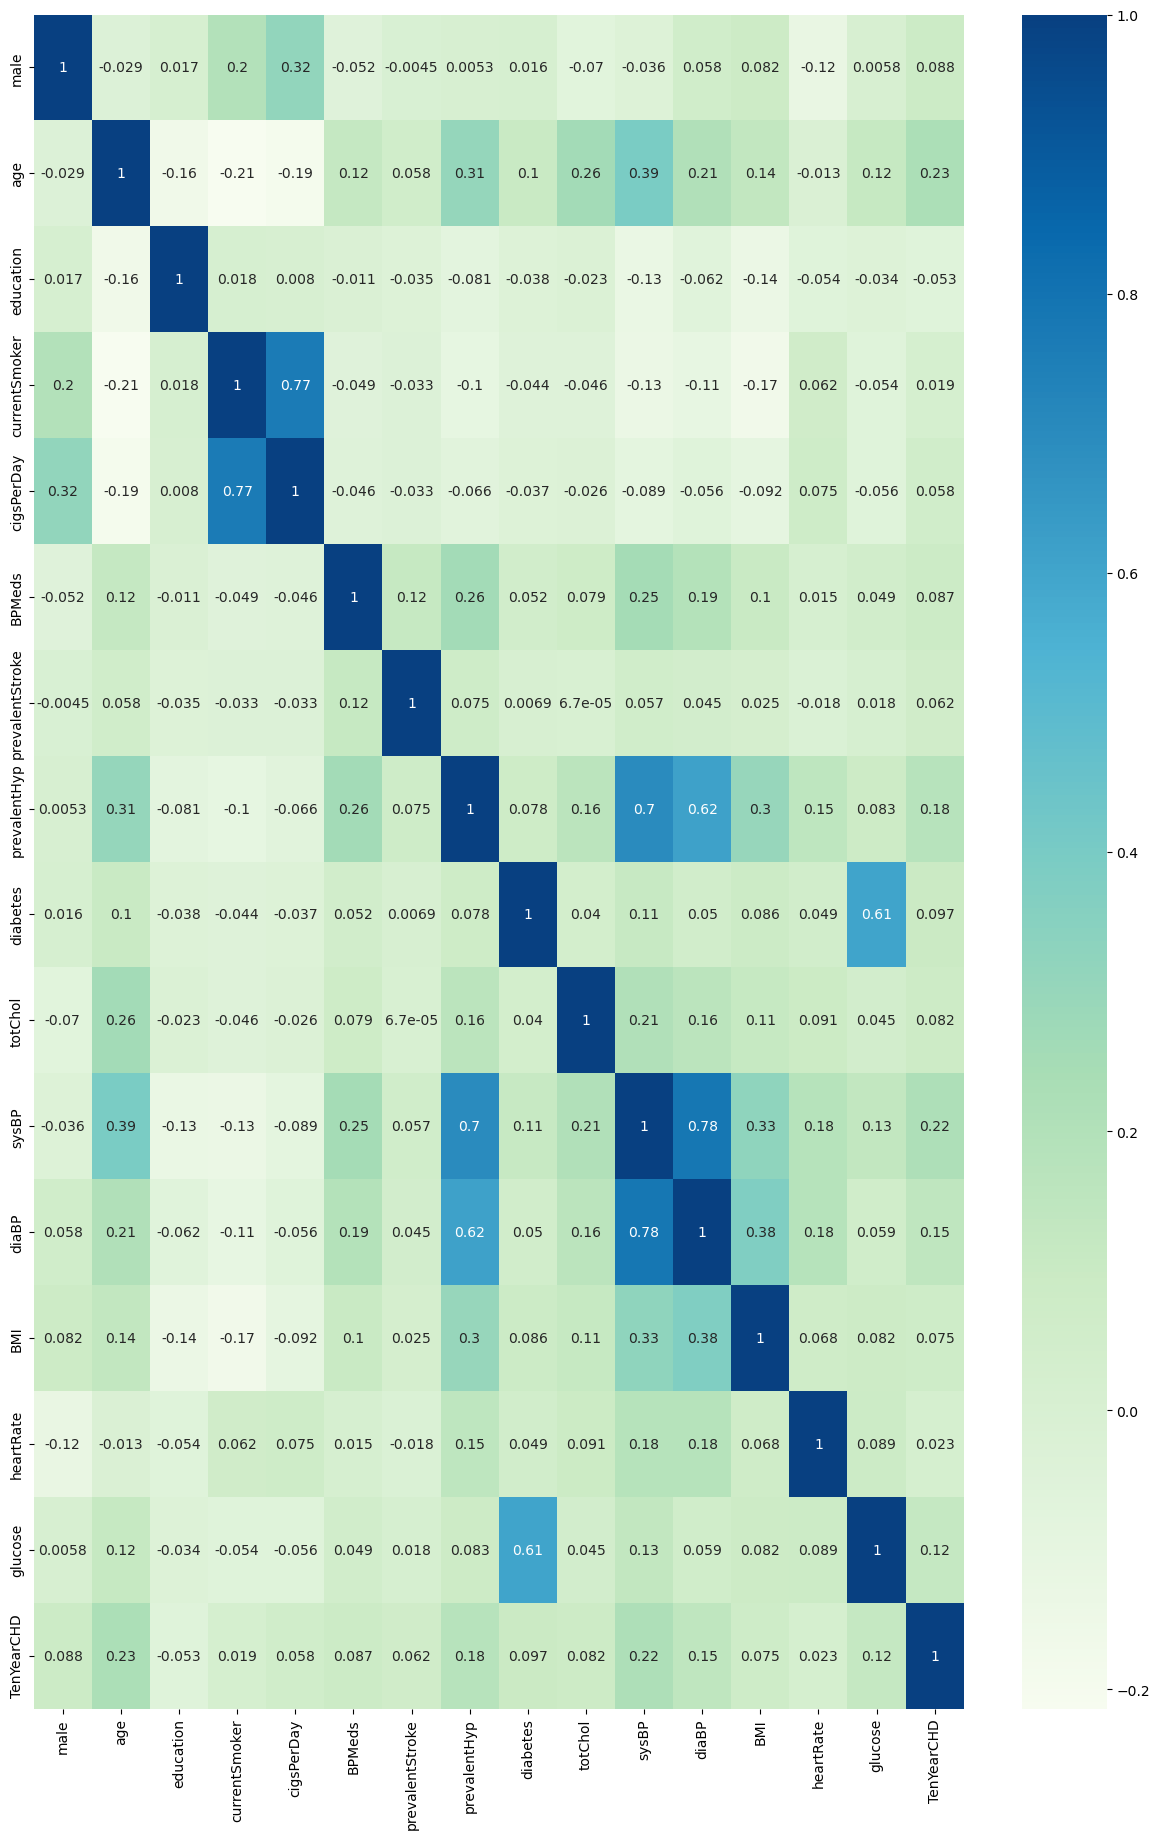

In [16]:
#Matriz de correlacion
macorr=data.corr()
plt.figure(figsize=(15,22))
sns.heatmap(macorr, annot=True, cmap='GnBu')

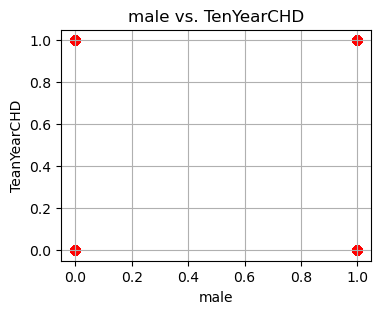

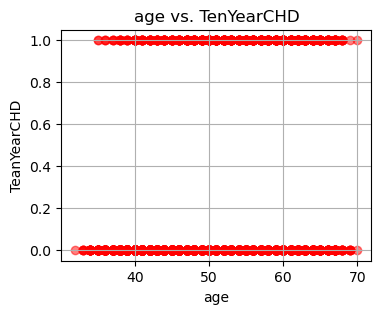

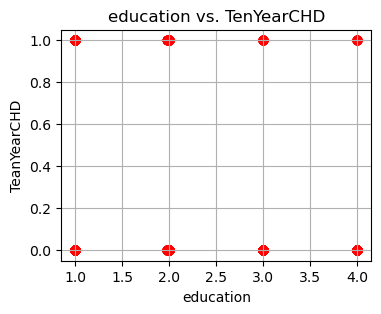

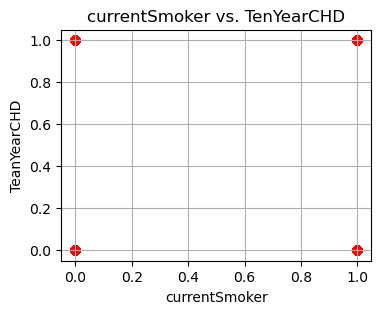

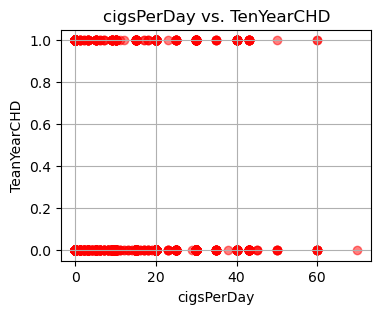

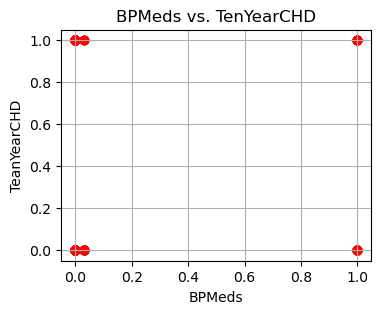

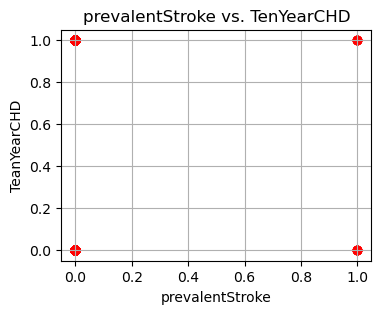

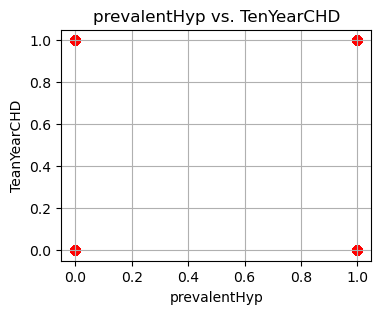

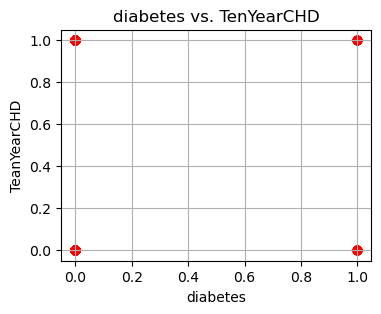

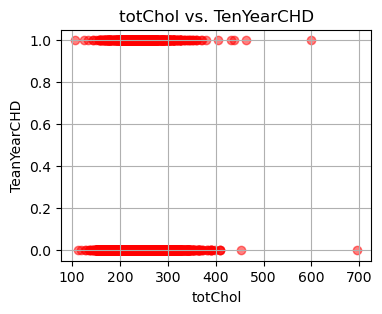

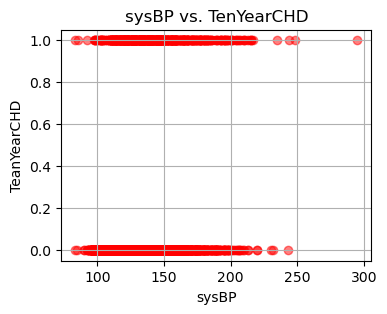

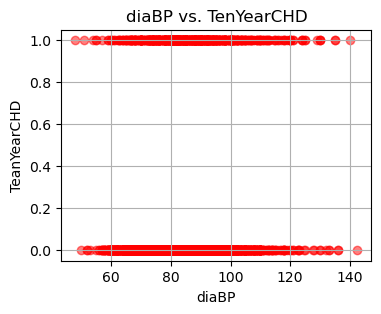

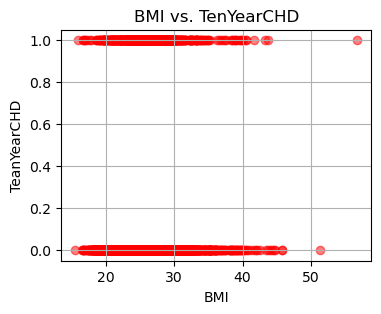

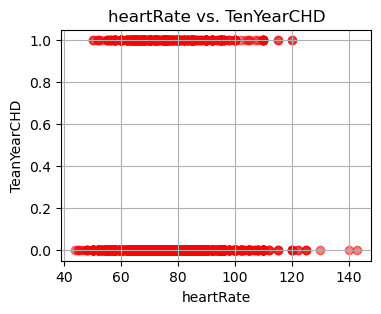

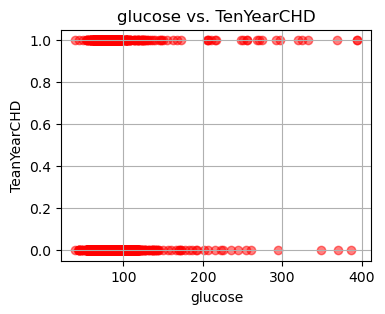

In [18]:
#Relacion variable objetivo vs variables independientes
variables_ind=data.columns.drop('TenYearCHD')

for variable in variables_ind:
    plt.figure(figsize=(4,3))
    plt.scatter(data[variable], data['TenYearCHD'],alpha=0.5,color="red")
    plt.xlabel(variable)
    plt.ylabel('TeanYearCHD')
    plt.title(f'{variable} vs. TenYearCHD')
    plt.grid(True)
    plt.show()

In [21]:
#Se retiran las variable que no se incluiran en el modelo de regresion logistica

variables_finales = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

data_final = data[variables_finales].copy()
data_final.head(10)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,43,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,63,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,45,20.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,52,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,43,30.0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [22]:
#Modelo de regresión logistica

x = data_final.drop('TenYearCHD',axis=1)
y = data_final['TenYearCHD']

In [23]:
#Separacion de datos en train y test 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y, random_state=0)

In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[ 0.16699237, -0.75092052, -0.8854479 , ..., -0.4861003 ,
         0.00578746,  0.87443841],
       [-0.64377495, -0.75092052, -0.39296146, ...,  1.8849365 ,
         1.0025108 , -0.42131873],
       [-0.41212715,  0.92158895, -1.26067567, ..., -1.38171566,
        -0.07727282,  0.15457334],
       ...,
       [-0.41212715, -0.75092052, -0.08808889, ..., -1.63584343,
        -1.32317699,  0.01060032],
       [-0.75959886, -0.75092052,  0.12297673, ...,  1.52718381,
        -1.07399615,  0.05859133],
       [-1.22289447, -0.75092052, -0.20534757, ...,  0.22447056,
         1.58393275, -1.04520179]])

In [25]:
#Modelo de regresion logistica

reglog = LogisticRegression(random_state =0)
reglog.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [26]:
prediccion =reglog.predict (x_test)
prediccion

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [27]:
mconfig = confusion_matrix (y_test, prediccion)
mconfig

array([[1426,   12],
       [ 239,   19]], dtype=int64)

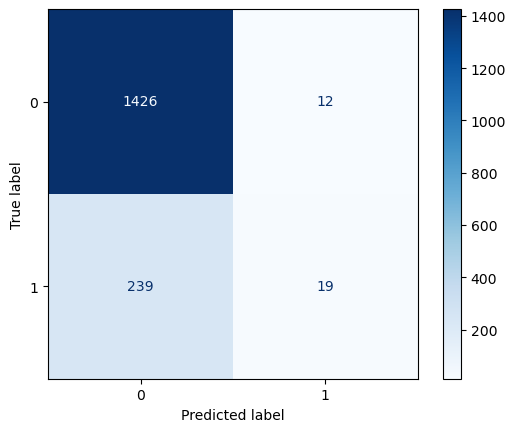

In [28]:
#Matriz de confusion

disp = ConfusionMatrixDisplay(mconfig)
disp.plot(cmap='Blues', values_format='d', colorbar=True)
plt.show()

In [29]:
#Calculo de metricas de evaluacion
accuracy=accuracy_score(y_test, prediccion)
precision= precision_score(y_test, prediccion)
recall = recall_score(y_test,prediccion)
f1 = f1_score(y_test,prediccion)

print(f'Exactitud: {accuracy * 100:.2f}%')
print(f'Precision: {precision *100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1: {f1 * 100:.2f}%')


Exactitud: 85.20%
Precision: 61.29%
Recall: 7.36%
F1: 13.15%


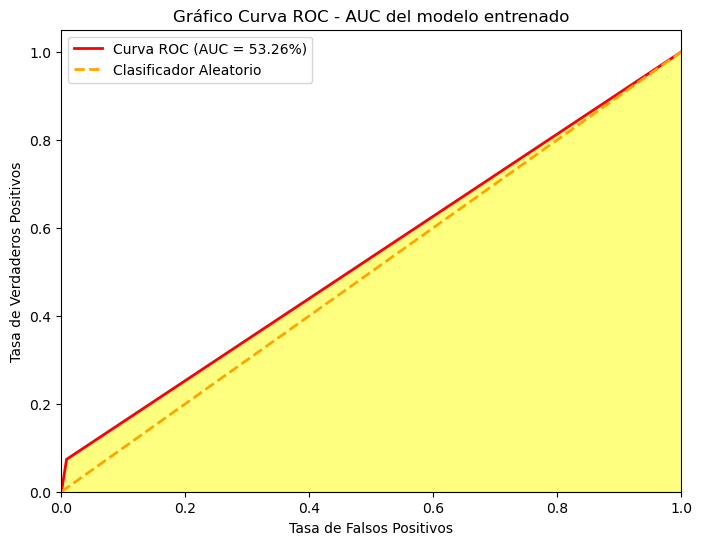

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, prediccion)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'Curva ROC (AUC = {roc_auc*100:.2f}%)')
plt.plot([0, 1], [0, 1], color='orange', lw=2, label=f'Clasificador Aleatorio', linestyle='--')
plt.fill_between(fpr, tpr, color='yellow', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Gráfico Curva ROC - AUC del modelo entrenado')
plt.legend(loc='upper left')
plt.show()